# UMAP reproducibility

This notebook will demonstrate how the output of a UMAP transform is influenced by a degree of randomness in the algorithm. 

In [ ]:
from skimage import data, measure
import napari_segment_blobs_and_things_with_membranes as nsbatwm
import umap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

We use the human mitosis dataset from [scikit-image](https://scikit-image.org/).

StackViewNDArray([[  0,   0,   0, ...,   2,   2,   2],
                  [  0,   0,   0, ...,   2,   2,   2],
                  [  0,   0,   0, ...,   2,   2,   2],
                  ...,
                  [  0,   0,   0, ...,   0,   0, 315],
                  [  0,   0,   0, ...,   0,   0, 315],
                  [  0,   0,   0, ...,   0,   0, 315]])
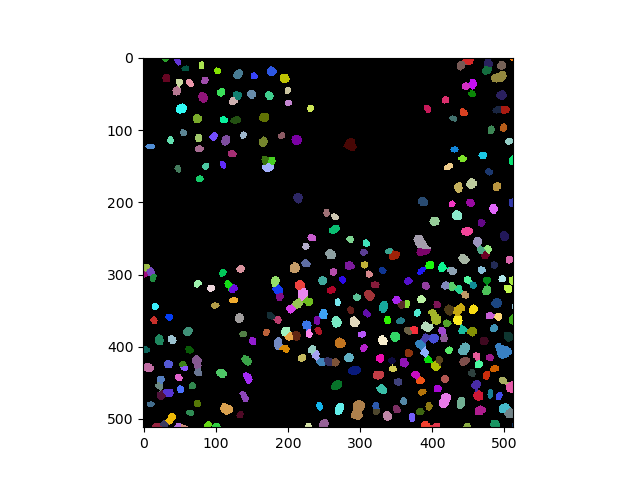

In [24]:
image = data.human_mitosis()
labels = nsbatwm.voronoi_otsu_labeling(image)
labels

We now measure a bunch of features from this dataset:

In [25]:
properties_to_measure = ('area', 'eccentricity', 'mean_intensity', 'perimeter', 'max_intensity', 'solidity')
features = pd.DataFrame(
    measure.regionprops_table(np.asarray(labels), image, properties=properties_to_measure)
)
features.head(5)

,area,eccentricity,mean_intensity,perimeter,max_intensity,solidity
0,10,0.945163,50.400000,10.414214,68.0,1.000000
1,22,0.775067,54.363636,16.035534,78.0,0.956522
2,60,0.712319,50.933333,27.656854,63.0,0.937500
3,137,0.673298,57.489051,42.970563,82.0,0.971631
4,80,0.772318,56.087500,32.970563,86.0,0.919540


We run the umap algorithm on the measured features:

In [ ]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(features)

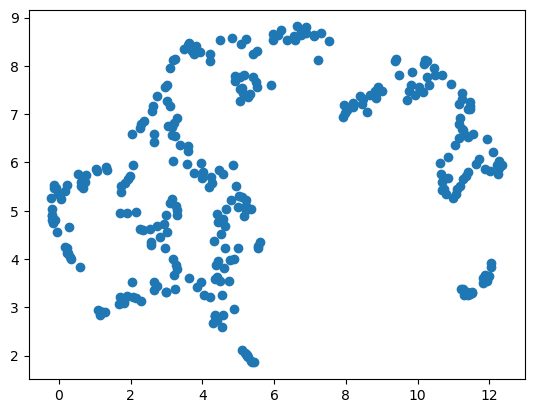

In [27]:
fig, ax = plt.subplots()
ax.scatter(embedding[:, 0], embedding[:, 1])

Let's repeat this a couple of times:

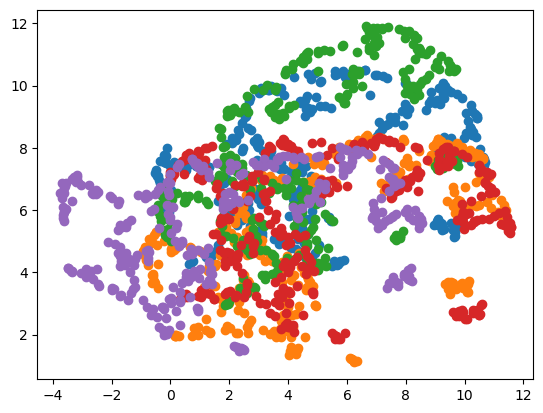

In [31]:
n_experiments = 5
fig, ax = plt.subplots()

for i in range(n_experiments):
    reducer = umap.UMAP()
    embedding = reducer.fit_transform(features)
    ax.scatter(embedding[:, 0], embedding[:, 1])

    fig.savefig(f'./umap_deterministic_{i}.png')